In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#### Data infos
* CBSA Code - The core-based statistical area (CBSA) code. CBSA = a U.S. geographic area defined by the Office of Management and Budget (OMB) that consists of one or more counties.
* Date - The day of measurement.
* AQI - The average air quality index (AQI) value for the day.
* Category - The category of air quality ranging from "Good" to "Hazardous".
* Defining Parameter - One of PM2.5 (particulate matter), PM10, Ozone, Carbon Monoxide, Sulfur Dioxide, or Nitrogen Dioxide which has the highest concentration.
* Number of Sites Reporting - The number of stations used to make the data aggregation.
* city_ascii - Name of the city where the measurement was taken.
* state_id - Abbreviation of the state where the measurement was taken.
* state_name - The state where the measurement was taken.
* lat - The latitude where the measurement was taken.
* lng - The longitude where the measurement was taken.
* population - The population of the region where the measurement was taken.
* density - The population per square kilometer where the measurement was taken.
* timezone - The time zone of the region where the measurement was taken.

In [2]:
air_df = pd.read_csv("US_AQI.csv")
air_df.head()

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


In [3]:
air_df.shape

(5617325, 15)

In [4]:
air_df.drop(['Unnamed: 0', 'CBSA Code', 'city_ascii', 'state_id', 'lat', 'lng', 'timezone'], axis=1, inplace=True)
air_df

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,state_name,population,density
0,2022-01-01,21,Good,PM2.5,2,Washington,16571.0,588.0
1,2022-01-02,12,Good,PM2.5,2,Washington,16571.0,588.0
2,2022-01-03,18,Good,PM2.5,2,Washington,16571.0,588.0
3,2022-01-04,19,Good,PM2.5,2,Washington,16571.0,588.0
4,2022-01-05,17,Good,PM2.5,2,Washington,16571.0,588.0
...,...,...,...,...,...,...,...,...
5617320,1980-12-27,52,Moderate,CO,1,Arizona,137612.0,311.0
5617321,1980-12-28,52,Moderate,CO,1,Arizona,137612.0,311.0
5617322,1980-12-29,24,Good,CO,1,Arizona,137612.0,311.0
5617323,1980-12-30,14,Good,CO,1,Arizona,137612.0,311.0


In [5]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617325 entries, 0 to 5617324
Data columns (total 8 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       object 
 1   AQI                        int64  
 2   Category                   object 
 3   Defining Parameter         object 
 4   Number of Sites Reporting  int64  
 5   state_name                 object 
 6   population                 float64
 7   density                    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 342.9+ MB


In [10]:
# air_df['Date'] = air_df['Date'].apply(lambda x: pd.Timestamp(x))
# air_df['Date'] = pd.to_datetime(air_df['Date'])
air_df['Date'] = pd.to_numeric(pd.to_datetime(air_df['Date']))
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617325 entries, 0 to 5617324
Data columns (total 8 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Date                       int64  
 1   AQI                        int64  
 2   Category                   object 
 3   Defining Parameter         object 
 4   Number of Sites Reporting  int64  
 5   state_name                 object 
 6   population                 float64
 7   density                    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 342.9+ MB


In [11]:
air_df

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,state_name,population,density
0,1640995200000000000,21,Good,PM2.5,2,Washington,16571.0,588.0
1,1641081600000000000,12,Good,PM2.5,2,Washington,16571.0,588.0
2,1641168000000000000,18,Good,PM2.5,2,Washington,16571.0,588.0
3,1641254400000000000,19,Good,PM2.5,2,Washington,16571.0,588.0
4,1641340800000000000,17,Good,PM2.5,2,Washington,16571.0,588.0
...,...,...,...,...,...,...,...,...
5617320,346723200000000000,52,Moderate,CO,1,Arizona,137612.0,311.0
5617321,346809600000000000,52,Moderate,CO,1,Arizona,137612.0,311.0
5617322,346896000000000000,24,Good,CO,1,Arizona,137612.0,311.0
5617323,346982400000000000,14,Good,CO,1,Arizona,137612.0,311.0


In [12]:
air_df.dtypes

Date                           int64
AQI                            int64
Category                      object
Defining Parameter            object
Number of Sites Reporting      int64
state_name                    object
population                   float64
density                      float64
dtype: object

In [13]:
air_df.dropna(inplace=True)

In [14]:
air_df.isnull().sum()

Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Number of Sites Reporting    0
state_name                   0
population                   0
density                      0
dtype: int64

In [15]:
air_df.isna().any()
air_df

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,state_name,population,density
0,1640995200000000000,21,Good,PM2.5,2,Washington,16571.0,588.0
1,1641081600000000000,12,Good,PM2.5,2,Washington,16571.0,588.0
2,1641168000000000000,18,Good,PM2.5,2,Washington,16571.0,588.0
3,1641254400000000000,19,Good,PM2.5,2,Washington,16571.0,588.0
4,1641340800000000000,17,Good,PM2.5,2,Washington,16571.0,588.0
...,...,...,...,...,...,...,...,...
5617320,346723200000000000,52,Moderate,CO,1,Arizona,137612.0,311.0
5617321,346809600000000000,52,Moderate,CO,1,Arizona,137612.0,311.0
5617322,346896000000000000,24,Good,CO,1,Arizona,137612.0,311.0
5617323,346982400000000000,14,Good,CO,1,Arizona,137612.0,311.0


In [16]:
air_df.shape

(5617325, 8)

In [18]:
X = air_df.drop(['Category'], axis=1)
X

,Date,AQI,Defining Parameter,Number of Sites Reporting,state_name,population,density
0,1640995200000000000,21,PM2.5,2,Washington,16571.0,588.0
1,1641081600000000000,12,PM2.5,2,Washington,16571.0,588.0
2,1641168000000000000,18,PM2.5,2,Washington,16571.0,588.0
3,1641254400000000000,19,PM2.5,2,Washington,16571.0,588.0
4,1641340800000000000,17,PM2.5,2,Washington,16571.0,588.0
...,...,...,...,...,...,...,...
5617320,346723200000000000,52,CO,1,Arizona,137612.0,311.0
5617321,346809600000000000,52,CO,1,Arizona,137612.0,311.0
5617322,346896000000000000,24,CO,1,Arizona,137612.0,311.0
5617323,346982400000000000,14,CO,1,Arizona,137612.0,311.0


In [19]:
y = air_df["Category"]
y

0              Good
1              Good
2              Good
3              Good
4              Good
             ...   
5617320    Moderate
5617321    Moderate
5617322        Good
5617323        Good
5617324        Good
Name: Category, Length: 5617325, dtype: object

In [22]:
parameter_list = air_df["Defining Parameter"].value_counts().index.tolist()
print(parameter_list)

['Ozone', 'PM2.5', 'PM10', 'NO2', 'CO']


In [23]:
state_list = air_df['state_name'].value_counts().index.tolist()
print(state_list)

['California', 'Pennsylvania', 'Texas', 'Florida', 'Ohio', 'North Carolina', 'Washington', 'Indiana', 'Wisconsin', 'Michigan', 'New York', 'Tennessee', 'Oregon', 'Illinois', 'Colorado', 'Georgia', 'Louisiana', 'South Carolina', 'New Mexico', 'Alabama', 'Arizona', 'Iowa', 'Kentucky', 'Oklahoma', 'Montana', 'Virginia', 'West Virginia', 'Mississippi', 'Wyoming', 'Nevada', 'Minnesota', 'Missouri', 'Utah', 'Connecticut', 'Idaho', 'Arkansas', 'New Hampshire', 'Massachusetts', 'Maine', 'Maryland', 'New Jersey', 'North Dakota', 'Kansas', 'Nebraska', 'South Dakota', 'Alaska', 'Vermont', 'Puerto Rico', 'Hawaii', 'District of Columbia', 'Rhode Island', 'Delaware']


In [24]:
from sklearn import preprocessing
le_parameter = preprocessing.LabelEncoder()
le_parameter.fit(parameter_list)
X['Defining Parameter'] = le_parameter.transform(X['Defining Parameter']) 


le_state = preprocessing.LabelEncoder()
le_state.fit(state_list)
X['state_name'] = le_state.transform(X['state_name'])

X

,Date,AQI,Defining Parameter,Number of Sites Reporting,state_name,population,density
0,1640995200000000000,21,4,2,48,16571.0,588.0
1,1641081600000000000,12,4,2,48,16571.0,588.0
2,1641168000000000000,18,4,2,48,16571.0,588.0
3,1641254400000000000,19,4,2,48,16571.0,588.0
4,1641340800000000000,17,4,2,48,16571.0,588.0
...,...,...,...,...,...,...,...
5617320,346723200000000000,52,0,1,2,137612.0,311.0
5617321,346809600000000000,52,0,1,2,137612.0,311.0
5617322,346896000000000000,24,0,1,2,137612.0,311.0
5617323,346982400000000000,14,0,1,2,137612.0,311.0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [27]:
airTree = DecisionTreeClassifier(criterion="entropy")

In [28]:
airTree.fit(X_train,y_train)
predTree = airTree.predict(X_test)

In [29]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9999994065979191


In [30]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt


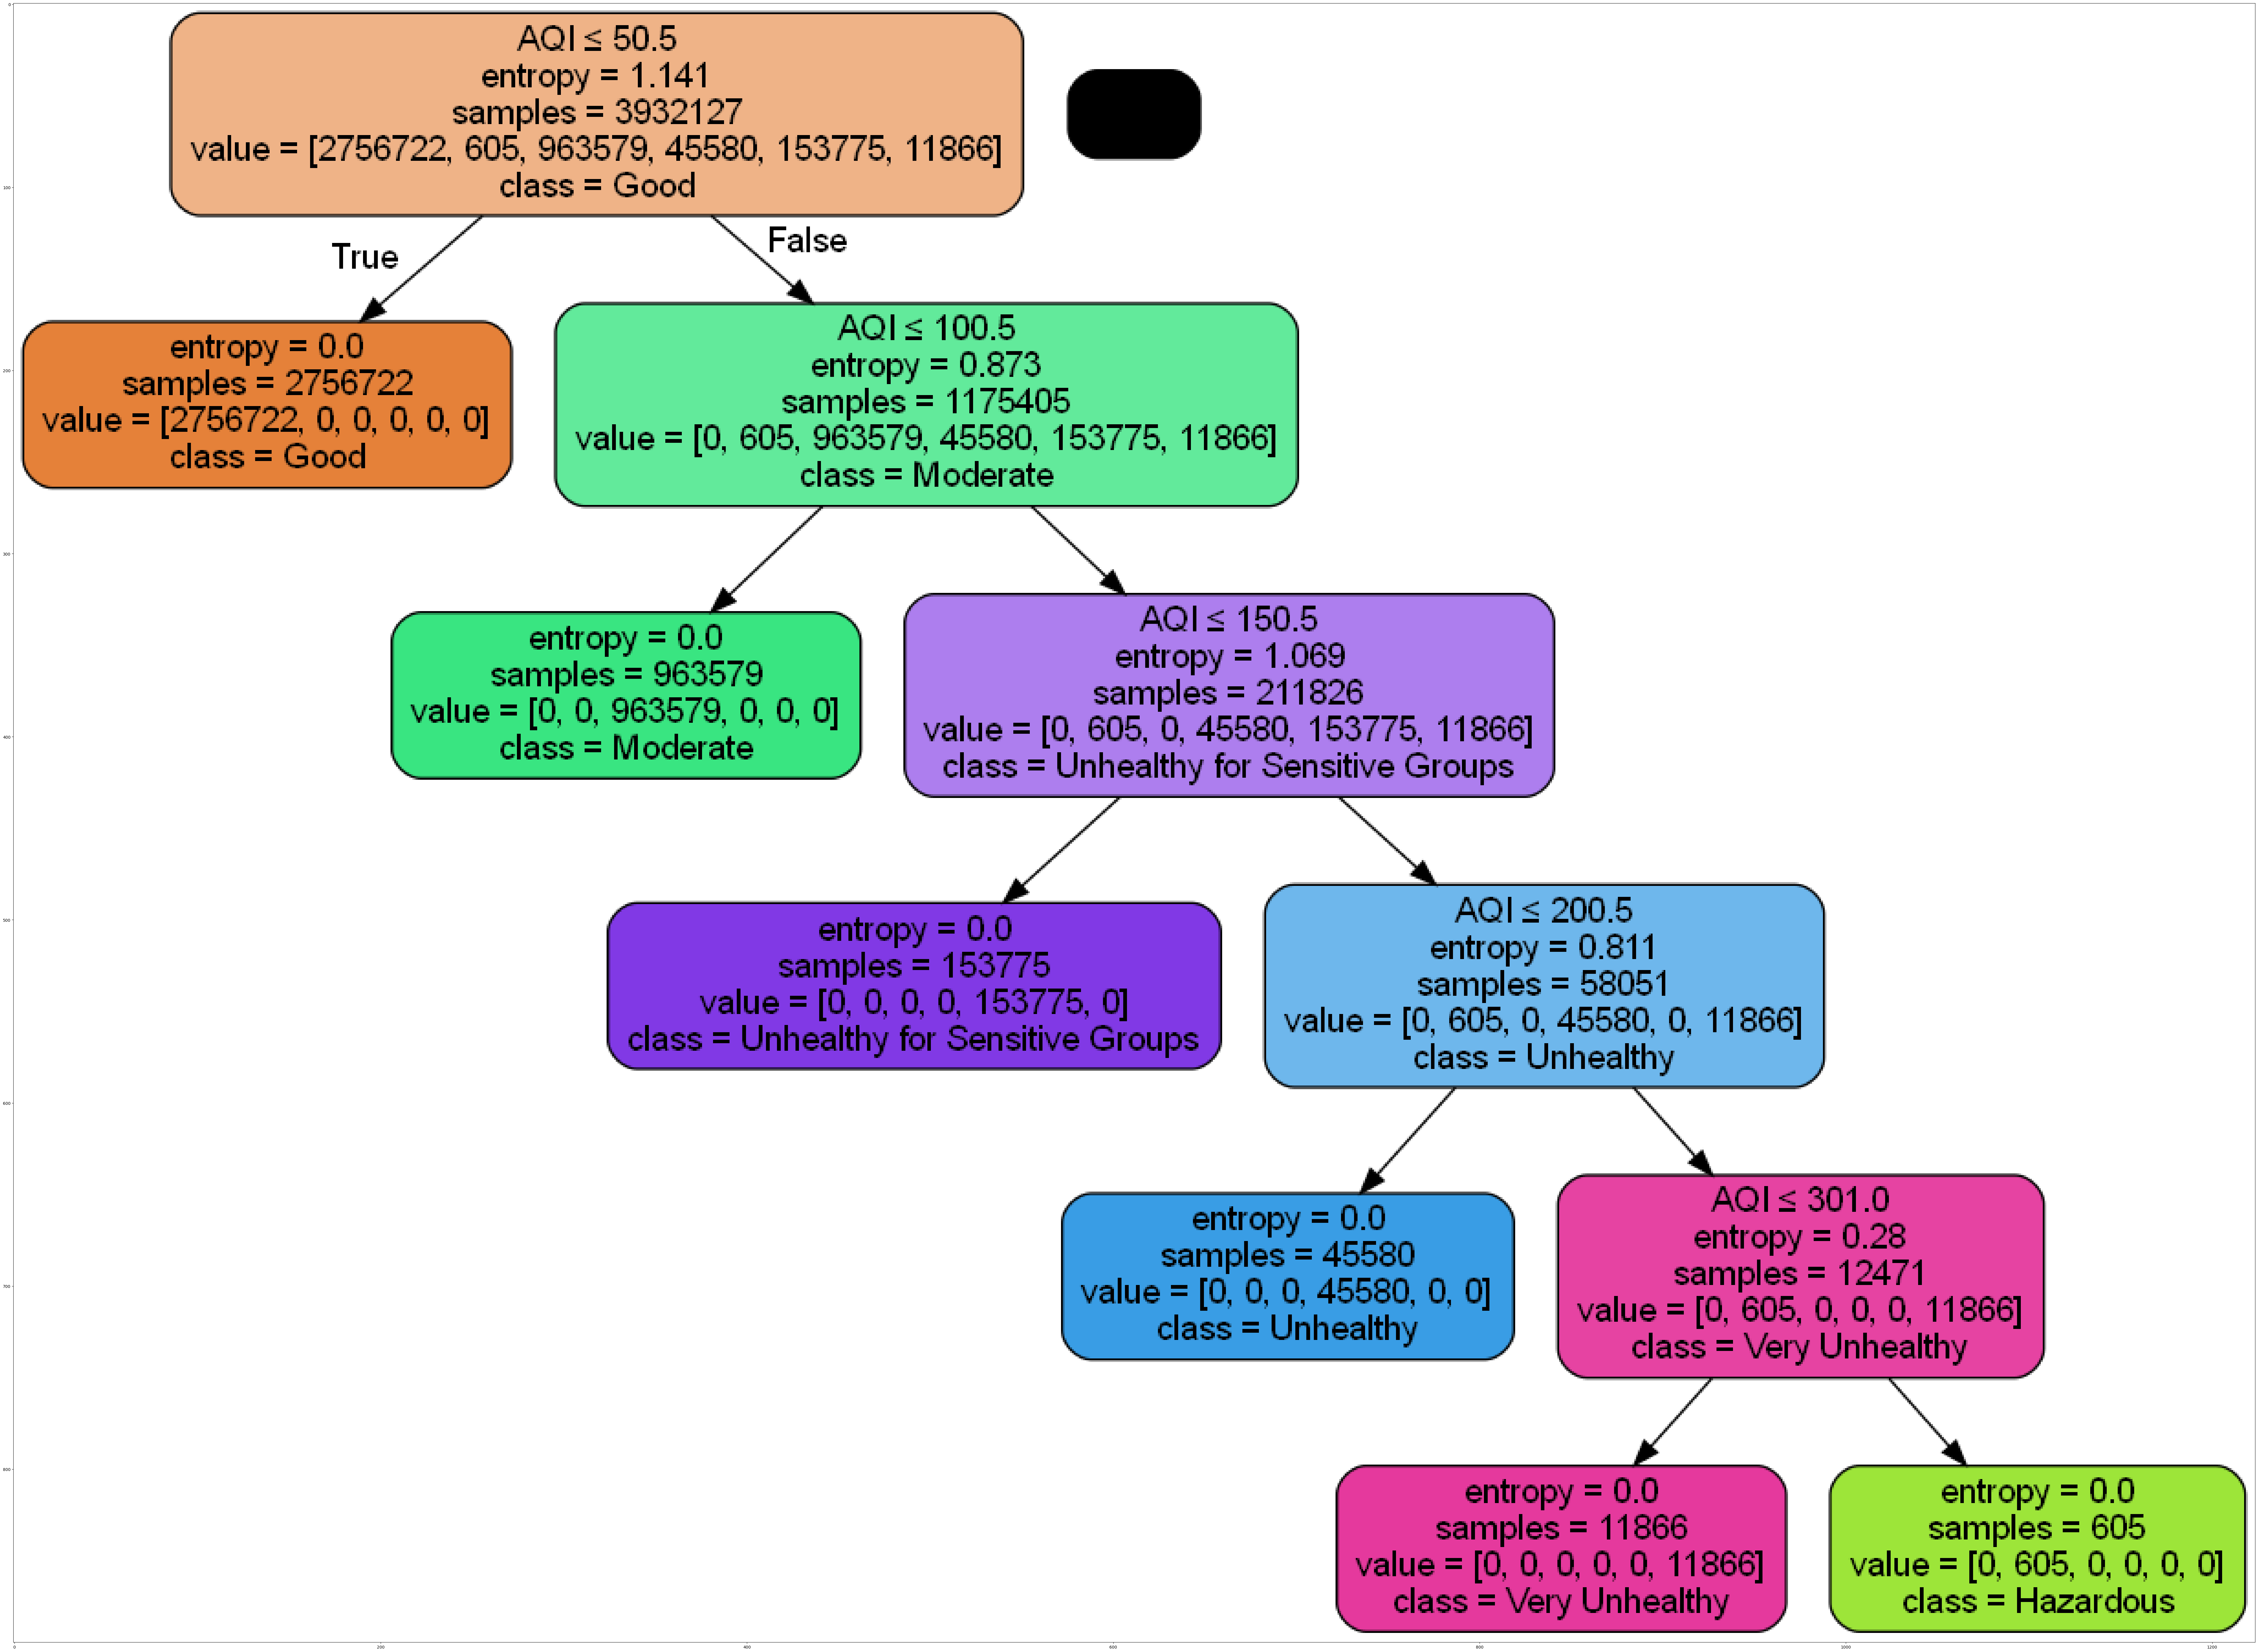

In [31]:
dot_data = StringIO()
filename = "airtree.png"
featureNames = X.columns
out=tree.export_graphviz(airTree,feature_names=featureNames,out_file=dot_data, class_names=np.unique(y_train),filled=True,rounded=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')